# MNIST Dataset

MNIST dataset ("Modified National Institute of Standards and Technology") contains a large set of handwritten digits which is widely used for training a machine to read human-written numbers (0-9).

***
**Disclaimer:** this work is inspired by my friends project and intentionally created for education purpose solely. So, datasets, materials and some code used in this project belong to their respective owners and I does not claim any right over them.
***

In [4]:
import numpy

features = numpy.load("features.npy")
labels = numpy.load("labels.npy") #the target of each case i.e. number in range (0-9)

# display the first case
features[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   4, 145,  98,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  60, 254, 102,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Each image contains 28x28 pixels with greyscale RGB codes (784 features with values ranging from 0 to 255) which can be visualized as an image using maplotlib.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualized(imageAsArray):
    imageAsArray = imageAsArray.reshape(28, 28);
    plt.imshow(imageAsArray, cmap='gray')
    plt.show()

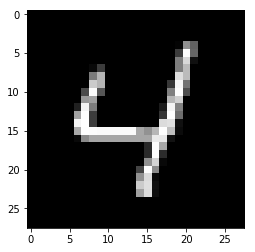

In [3]:
# use the function visualized to display a handwritten digit case 1 (index 0)
visualized(features[0])

**import necessary library**

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

# **PREPROCESSING**

**Processing Catagorical data**

***
No need to use `LabelEncoder` because all Feature is *Continuous(Ratio) variable* not a Catagorical variable then no need further process step for catagorical data like `OneHotEncoder`
***

**checking Missing Value**

In [5]:
print(numpy.isnan(numpy.sum(features)))
print(numpy.isnan(numpy.sum(labels)))

False
False


***
Since this datasets have not contain `Nan`, We can skip to next process
instead of Dealing with it
***

**Feature Scaling**

***
all 784 features in this datset is already in the same scale (0-255) *greyscale RGB codes*. So, we dont need to use Feature Scaling technique. Nevertheless, the labels dataset is already in a `numpy` array format. In conslusion, we dont make any preprocessing on this dataset
***

# **Partitioning a dataset**

**Using Hold out method**
Conventionally, we split a dataset into Training, Validation, and Test sets with proportion of train:validate:test be 60:20:20
and set `random_state` parameter to some number which in this case be *42* for reproducible result.
In addition, setting `satisfy` be *labels* to make our training (train and validate set) spliting represent the proportion of each class(0-9) in the lables.

In [5]:
#first split into 1. for train and validate 2. for test
X_train_validate, X_test, y_train_validate, y_test = train_test_split \
(features, labels, test_size=0.20, random_state=42, stratify=labels)

split the train dataset into train and validate dataset

In [6]:
#second split into 1. for train 2. for validate to be able to further process
X_train, X_validate, y_train, y_validate = train_test_split \
(X_train_validate, y_train_validate, test_size=0.25, random_state=42, \
 stratify=y_train_validate)

In conclusion, we use *Train set* to fit our candidate model, *Validate set* for model selection and tuning selected model's parameter and *Test set* to evaluate the optimized model.

# **Building a model**

We try to fit training set with these following model having the default parameter  
* K Nearest NeighborsClassifier
* Decision Tree Classifier
* Perceptron
* Linear classifiers (SVM) with SGD training.

In [7]:
#**create the default version of kNN classifier
kNN = KNeighborsClassifier()
kNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
#**create the default version of DT classifier
DT = DecisionTreeClassifier(random_state=42)
DT = DT.fit(X_train,y_train)

In [9]:
#**create the default version of PCT classifier
PCT = Perceptron(random_state=42)
PCT = PCT.fit(X_train,y_train)

C:\Users\Pop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [10]:
#**create the default version of SGD classifier
SGD = SGDClassifier(random_state=42)
SGD = SGD.fit(X_train,y_train)

C:\Users\Pop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In conclusion, we have built 4 models which we have selected with its default parameter that provided by `scikit-learn` package

# **Evaluation Metric**

We use *accuracy score* obtained form `accuracy_score` function as *Evaluation Metric* cause we dont use *k-Fold Cross-Validation* because it required significantly higher computational power and time.
for Baseline, we use *majority baseline* to be the minimum accuracy score that model should achieve 
to be recognized that model can recognize some pattern in the dataset.

In [11]:
DC = DummyClassifier(strategy="most_frequent")
DC.fit(X_train, y_train)
DC.predict(X_validate)
print("majority baseline: ",DC.score(X_validate, y_validate))

majority baseline:  0.11224489795918367


**evaluate the model accuracy** by *comparing those fitted models accuracy* using the `accuracy_score` function by making each models predict the *validation set* moreover, we use the `accuracy_score` for **model selection**.

In [12]:
#make each model predict "y_validate"
y_pred_kNN = kNN.predict(X_validate)
y_pred_DT = DT.predict(X_validate)
y_pred_PCT = PCT.predict(X_validate)
y_pred_SGD = SGD.predict(X_validate)

In [14]:
#for default kNN
print("accuracy_score: ",accuracy_score(y_validate,y_pred_kNN))

accuracy_score:  0.9585034013605442


In [15]:
#for default DT
print("accuracy_score: ",accuracy_score(y_validate,y_pred_DT))

accuracy_score:  0.8357142857142857


In [16]:
#for default PCT
print("accuracy_score: ",accuracy_score(y_validate,y_pred_PCT))

accuracy_score:  0.8324829931972789


In [17]:
#for default SGD
print("accuracy_score: ",accuracy_score(y_validate,y_pred_SGD))

accuracy_score:  0.8377551020408164


with `accuracy_score` function we can conclude that all 4 model with default parameter can achieve score at Which better than the *majority baseline* and the model that can achieve highest accuray score is **the default kNN model** which is selected to use

# **Optimizing Model**

using for loop to tune `n_neighbors` with *appropriate range of value* along with `metric` parameter *appropriate distance calculation method* and evaluate the result with `accuracy_score` function by make model predict on the *validation set*.

In [18]:
#tuning 'n_neighbors' in range [1, 3, 5 ,7, 9]
#tuning 'metric' for "euclidean" and "manhattan"
#total 10 combination(-1)
score_kNN_i_list = []
for j in ["euclidean", "manhattan"]:
    for i in numpy.arange(1, 10, 2):    
        if i == 5 and j == "euclidean":
            continue #skip, we already evaluate this equavalent case in default model setting
        kNN_i = KNeighborsClassifier(n_neighbors = i, metric = j)
        kNN_i.fit(X_train,y_train)
        y_pred_kNN_i = kNN_i.predict(X_validate)
        score_kNN_i = accuracy_score(y_validate,y_pred_kNN_i)
        score_kNN_i_list.append(score_kNN_i)
        print("n_neighbors: %i metric: %s accuracy_score: %0.5f"\
              %(i, j, score_kNN_i))

n_neighbors: 1 metric: euclidean accuracy_score: 0.95510
n_neighbors: 3 metric: euclidean accuracy_score: 0.95867
n_neighbors: 7 metric: euclidean accuracy_score: 0.95595
n_neighbors: 9 metric: euclidean accuracy_score: 0.95357
n_neighbors: 1 metric: manhattan accuracy_score: 0.94711
n_neighbors: 3 metric: manhattan accuracy_score: 0.95153
n_neighbors: 5 metric: manhattan accuracy_score: 0.95102
n_neighbors: 7 metric: manhattan accuracy_score: 0.94864
n_neighbors: 9 metric: manhattan accuracy_score: 0.94694


for case that `n_neighbors` be *5* and `metric` be *manhattan* we already optained from previously evaluate default kNN with `accuracy_score` be 0.9585034013605442

In [21]:
score_kNN_i_list

[0.9551020408163265,
 0.9586734693877551,
 0.955952380952381,
 0.9535714285714286,
 0.947108843537415,
 0.951530612244898,
 0.9510204081632653,
 0.9486394557823129,
 0.9469387755102041]

In [22]:
score_kNN_i_list.insert(2, 0.9585034013605442) #insert the mentioned case's accuracy score into the list

In [23]:
score_kNN_i_list

[0.9551020408163265,
 0.9586734693877551,
 0.9585034013605442,
 0.955952380952381,
 0.9535714285714286,
 0.947108843537415,
 0.951530612244898,
 0.9510204081632653,
 0.9486394557823129,
 0.9469387755102041]

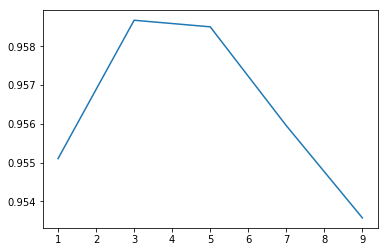

In [25]:
plt.plot([1, 3, 5 ,7, 9], score_kNN_i_list[0:5]) #"euclidean"

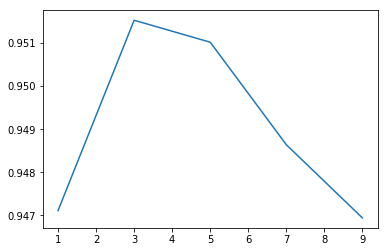

In [26]:
plt.plot([1, 3, 5 ,7, 9], score_kNN_i_list[5:10]) #"manhattan"

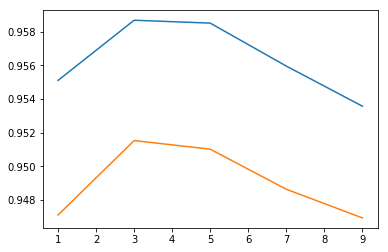

In [27]:
plt.plot([1, 3, 5 ,7, 9], score_kNN_i_list[0:5],[1, 3, 5 ,7, 9], score_kNN_i_list[5:10]) #"euclidean", #"manhattan"

from the plotted graph for each combination of `n_neighbors` and distance `metric`
against *accuracy score* since for `n_neighbors` the greater value the lower accuracy score in both `metric` be *euclidean* or *manhattan*. We conclude that in case, setting the `n_neighbors` be *3* and `metric` be *euclidean* give *best validation score*.

In [29]:
print("the best validation score is %0.5f" %(max(score_kNN_i_list)))

the best validation score is 0.95867


In [30]:
#fit train dataset in kNN with optimal parameters
kNN_Opt = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
kNN_Opt.fit(X_train,y_train)
#make model predict the test dataset
y_pred_kNN_Opt = kNN_Opt.predict(X_test)
#evaluate with test dataset
#accuracy_score:  0.957312925170068

We conclude that our predictive model base from
optimized kNN model can acheive

In [32]:
print("accuracy score: %0.5f" %accuracy_score(y_test,y_pred_kNN_Opt))

accuracy score: 0.95731


The *accuracy score* for the *test set* is slightly lower than the *accuracy score* for the *validation set* by approximately **0.00136**